In [ ]:
%pip install Pillow numpy opencv-python

In [ ]:
from PIL import Image, ImageDraw

# Define image dimensions and background color
width, height = 400, 300
background_color = "white"

# Create a new white image
img = Image.new("RGB", (width, height), background_color)
draw = ImageDraw.Draw(img)

# Define the circle parameters
circle_radius = 50
circle_color = "red"
center_x, center_y = width // 2, height // 2

# Calculate the bounding box for the circle
left = center_x - circle_radius
top = center_y - circle_radius
right = center_x + circle_radius
bottom = center_y + circle_radius

# Draw the red circle
draw.ellipse([(left, top), (right, bottom)], fill=circle_color)

# Optionally save the image
img.save("red_circle.png")

In [ ]:
import numpy as np
import cv2

# Load the image
img = cv2.imread("red_circle.png")

# Convert the image to float
img = img.astype(np.float64)

# Define the mean and standard deviation for the noise
mean = 0
stddev = 10  # You can adjust this value to control the amount of noise

# Generate Gaussian noise
noise = np.random.normal(mean, stddev, img.shape)

# Add the noise to the image
noisy_img = img + noise

# Clip the pixel values to be within the valid range [0, 255]
noisy_img = np.clip(noisy_img, 0, 255)

# Convert the image back to uint8
noisy_img = noisy_img.astype(np.uint8)

# Save the noisy image
cv2.imwrite("red_circle_noisy.png", noisy_img)

True

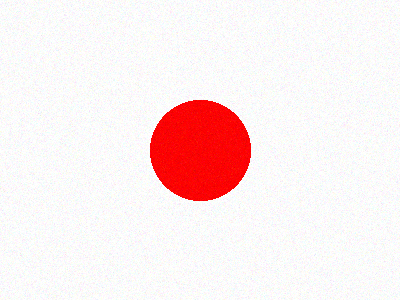

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(noisy_img)

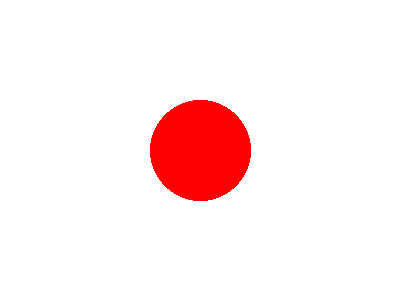

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread("red_circle.png")

cv2_imshow(img)

In [ ]:
def gaussian_smoothing(img):
    gaussian_kernel = [[1,2,1], [2,4,2], [1,2,1]]
    gaussian_kernel = np.array(gaussian_kernel)
    gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel)

    smoothed_img = cv2.filter2D(img, -1, gaussian_kernel)
    cv2_imshow(smoothed_img)
    return smoothed_img

In [ ]:
def edge_detection_with_thresholding(img, threshold):
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_img)

    # Apply the convolutional kernels
    derivative = cv2.filter2D(gray_img, -1, np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]))

    # Apply thresholding
    _, thresholded_derivative = cv2.threshold(derivative, threshold, 255, cv2.THRESH_BINARY)


    # Display the results
    cv2_imshow(thresholded_derivative)

## Without Smoothing

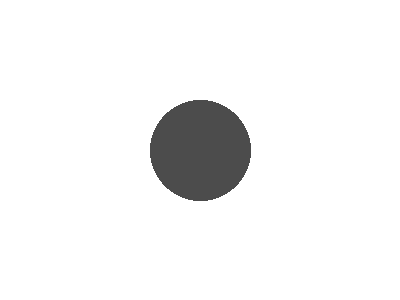

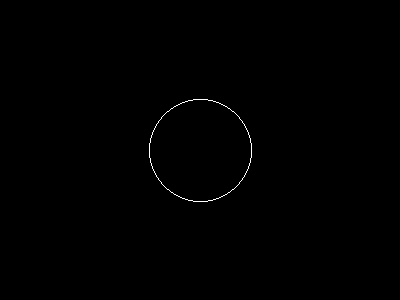

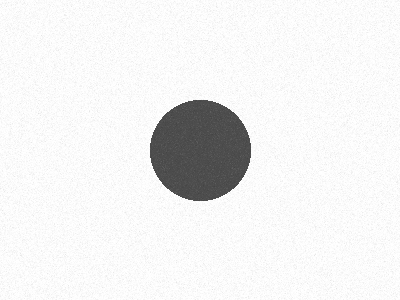

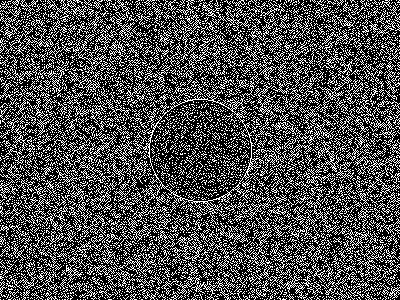

In [ ]:
threshold_value = 10
edge_detection_with_thresholding(img, threshold_value)
edge_detection_with_thresholding(noisy_img, threshold_value)

## With Smoothing

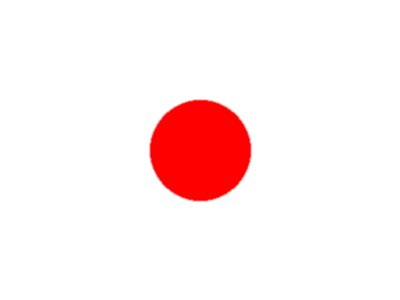

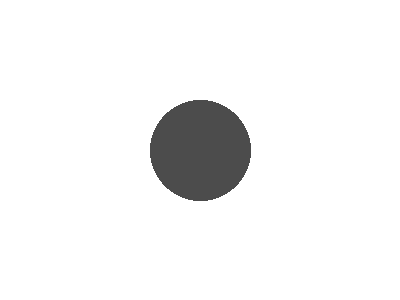

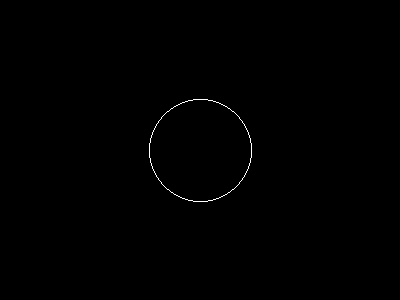

In [ ]:
gaussian_smoothing(img)
threshold_value = 20
edge_detection_with_thresholding(img, threshold_value)

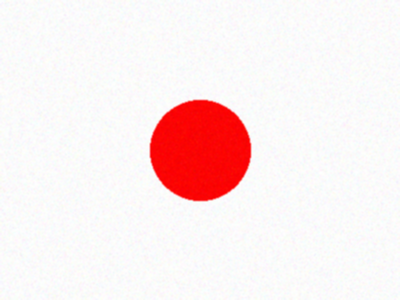

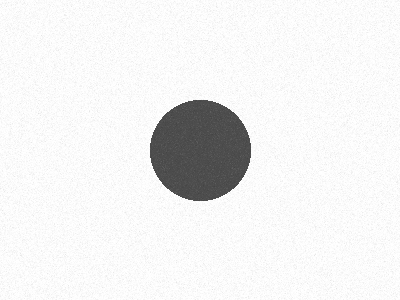

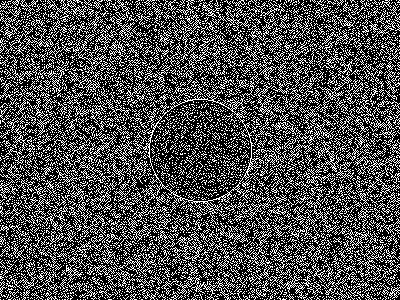

In [ ]:
gaussian_smoothing(noisy_img)
threshold_value = 10
edge_detection_with_thresholding(noisy_img, threshold_value)

## Counting Threshold crossings
Note: Due to the 2D nature of images clustering is used instead of a simple counting

**Skipped non-max suppression because it is irrelevant here**

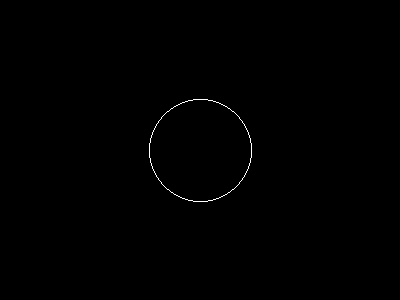

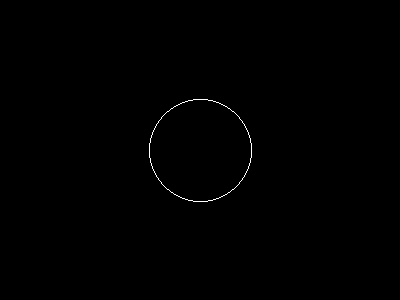

In [ ]:
def apply_hysteresis(edges, low_threshold, high_threshold):
    # Initialize the output image
    height, width = edges.shape
    hysteresis_edges = np.zeros((height, width), dtype=np.uint8)

    # Define strong and weak edges
    strong_edges = (edges > high_threshold)
    weak_edges = (edges >= low_threshold) & (edges <= high_threshold)

    # Initialize the list of strong edge coordinates
    strong_edge_coords = np.transpose(np.nonzero(strong_edges))

    # Perform edge tracking by connectivity
    while len(strong_edge_coords) > 0:
        x, y = strong_edge_coords[0]
        strong_edge_coords = strong_edge_coords[1:]

        # Check neighbors (8-connectivity)
        for i in range(-1, 2):
            for j in range(-1, 2):
                if (i != 0 or j != 0) and (x + i >= 0) and (x + i < height) and (y + j >= 0) and (y + j < width):
                    neighbor_x, neighbor_y = x + i, y + j
                    if weak_edges[neighbor_x, neighbor_y] and hysteresis_edges[neighbor_x, neighbor_y] == 0:
                        hysteresis_edges[neighbor_x, neighbor_y] = 255
                        strong_edge_coords = np.append(strong_edge_coords, [[neighbor_x, neighbor_y]], axis=0)

    # Add the initially strong edges
    hysteresis_edges[strong_edges] = 255

    return hysteresis_edges

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
derivative = cv2.filter2D(gray_img, -1, np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]))


low_threshold = 100  # Adjust these thresholds as needed
high_threshold = 200 # Adjust these thresholds as needed

hysteresis_output = apply_hysteresis(derivative, low_threshold, high_threshold)
cv2_imshow(hysteresis_output)

gray_img_noisy = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)
derivative_noisy = cv2.filter2D(gray_img_noisy, -1, np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]))
hysteresis_output_noisy = apply_hysteresis(derivative_noisy, low_threshold, high_threshold)
cv2_imshow(hysteresis_output_noisy)